# Probability and Statistics

**OBJECTIVES**

- Use Binomial Theorem to solve probability problems
- Use functions to model patterns in binomial triangle
- Use summation and product symbols
- Find mean and standard deviation of series
- Use Normal Distribution to evaluate probability

## Probability Review

<center>
    <img src = https://wikimedia.org/api/rest_v1/media/math/render/svg/23050fcb53d6083d9e42043bebf2863fa9746043 />
</center>

1. Using the triangle, determine how many ways we can get 3 Heads when we toss 5 coins.
2. What is the sum of the row you used to answer question 1.  
3. What does this mean in terms of our coin problem?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.special import comb

Let's build the next row of the triangle and compute some probabilities based on the graph.

In [2]:
#possible number of heads
outcomes = np.arange(9)
outcomes

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
#combination numbers for each
[comb(8,i) for i in outcomes]

[1.0, 8.0, 28.0, 56.0, 70.0, 56.0, 28.0, 8.0, 1.0]

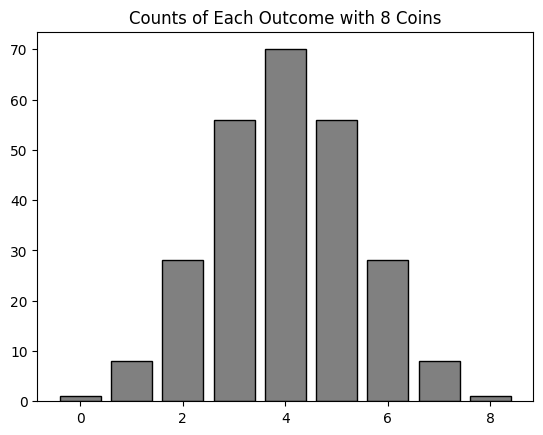

In [4]:
#plot of the counts
plt.bar(outcomes, [comb(8,i) for i in outcomes], edgecolor = 'black', color = 'gray')
plt.title('Counts of Each Outcome with 8 Coins');

1. How many total outcomes for 8 coins?
2. What is the probability of 6 heads?
3. What is the probability of at least 6 heads?
4. What is the probability of fewer than 4 heads?
5. What is the average number of coins you would expect to land on heads in 8 tosses?

## Notation

Summming a list of values is a common operation that we use the greek letter $\Sigma$ to denote.  For example, suppose we have the list of values:

```python
x = [1, 2, 1]
```

to add the complete list of values we would write:

$$\sum_{i = 0}^2 x_i = 1 + 2 + 1$$

Evaluate the following sums:

1. `x = [1, 2, 3, 4]`: $\displaystyle\sum_{i = 0}^3 x_i$
2. `x = [3, 4, 5, 6, 7]`; $\displaystyle\sum_{i = 0}^4 x_i$.
3. `x = [1, 3, 5, 7]`; $\displaystyle\sum_{i = 0}^4 x_i^2$.
4. `x = [3, 4, 5, 6, 7]`; $\displaystyle\frac{1}{5}\sum_{i = 0}^4 x_i$. What does this mean?


## Applications in Statistics

$$\textbf{Mean} =  \mu = \frac{1}{n}\sum_{i = 1} ^ n x_i$$

$$\textbf{Variance} = \sigma^2 = \frac{1}{n}\sum_{i = 1}^n (x_i - \mu)^2$$

$$\textbf{Standard Deviation} = \sigma$$

In [5]:
#plot of the counts
outcomes

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [6]:
counts = [comb(8,i) for i in outcomes]
counts

[1.0, 8.0, 28.0, 56.0, 70.0, 56.0, 28.0, 8.0, 1.0]

In [7]:
#binomial distribution
coins = stats.binom(8, 0.5)

In [8]:
#mean of distribution
coins.mean()

4.0

In [9]:
#standard deviation
coins.std()

1.4142135623730951

In [10]:
#if you must -- this is a weighted sum
sum([i*count for i,count in zip(outcomes, counts)])/sum(counts)

4.0

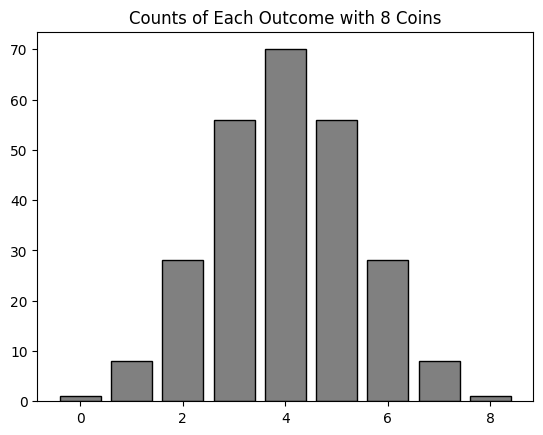

In [11]:
plt.bar(outcomes, [comb(8,i) for i in outcomes], edgecolor = 'black', color = 'gray')
plt.title('Counts of Each Outcome with 8 Coins');

## The Normal Distribution

A similar distribution to our binomial distribution is the *normal distribution* also called the *gaussian distribution*.  The primary difference between the normal distribution and binomial distribution is that the normal distribution has a continuous domain.  The functional form for the *gaussian probability density function* is:

$$\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$$

where:
    
- $\sigma$: standard deviation of data
- $\mu$: mean of the data
- $e$: the natural base $e$ (2.718...)

In our example above, we found the mean and standard deviation of the binomial distribution for tossing 8 coins.  We can use what we found above to model the example with a normal distribution.

In [12]:
#continuous version of our domain
x = np.linspace(0, 8, 100)
#define the distribution over domain
y = stats.norm(loc = 4, scale = 1.414)
y.pdf(x)[:4]

array([0.00516129, 0.00605702, 0.00708503, 0.00826049])

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_21785/1145484657.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Normal Distribution with $\mu = 4$ and $\sigma = 1.414$');


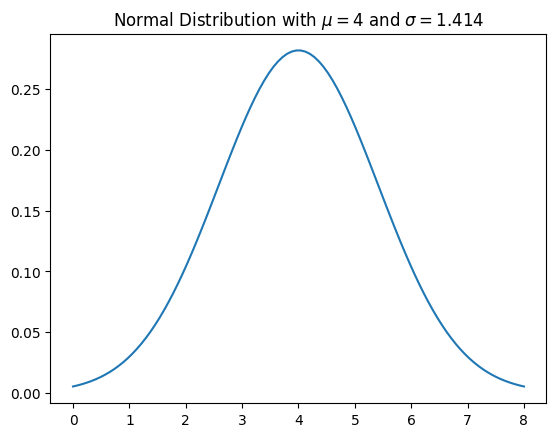

In [13]:
#plot normal distribution
plt.plot(x, y.pdf(x));
plt.title('Normal Distribution with $\mu = 4$ and $\sigma = 1.414$');

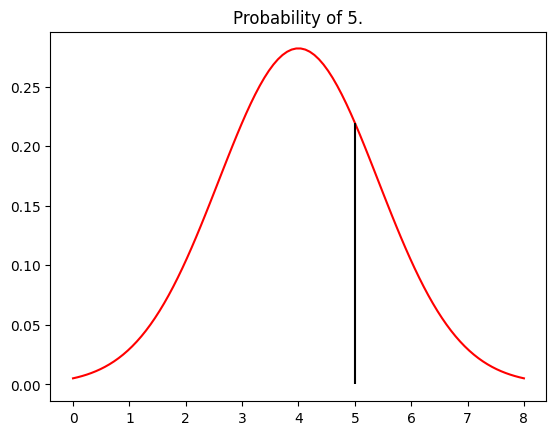

In [14]:
#plot normal distribution
plt.plot(x, y.pdf(x), color = 'red');
plt.title('Probability of 5.');
plt.vlines(5, 0, y.pdf(5), color = 'black')

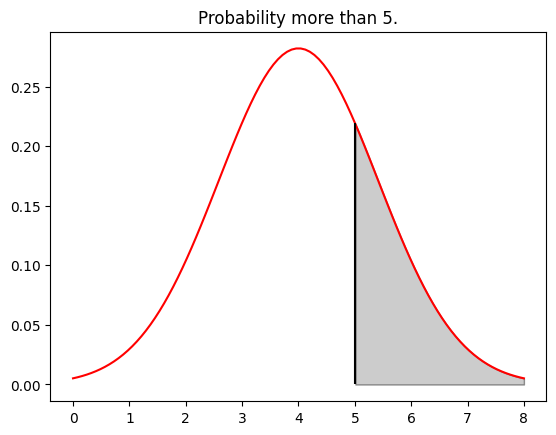

In [15]:
plt.plot(x, y.pdf(x), color = 'red');
plt.title('Probability more than 5.');
plt.vlines(5, 0, y.pdf(5), color = 'black')
plt.fill_between(x, y.pdf(x), where = x > 5, color = 'gray', edgecolor = 'black', alpha = 0.4);

In [16]:
#probability of five
y.pdf(5)

0.21971223238070992

In [17]:
#probability more than five
1 - y.cdf(5)

0.23971688078822906

### Summary

When we visualize all possible outcomes of a probabilistic situation, determining the probability of a certain outcome comes down to determining the area of discrete bars or regions beneath a curve.  



### Problems

1. Evaluate the following sums:

- $\displaystyle \sum_{i = 1}^1 i$
- $\displaystyle \sum_{i = 1}^2 i$
- $\displaystyle \sum_{i = 1}^3 i$
- $\displaystyle \sum_{i = 1}^4 i$
- $\displaystyle \sum_{i = 1}^5 i$

2. Determine a function to model the sequence of sums above.
3. Repeat the two exercises above for $\sum_i^n i^3$.
4. Determine the sum $\sum_{i = 1}^{10} i^2$
5. Determine the sum $\sum_{n = 1}^7 \frac{1}{n}$